# Load Time Lapse (Lapse It iOS App) Images and Compare Colors over time

220902 AFRG v1.0 <br>
220904 AFRG v1.1 <br>
220905 AFRG v2.0 Change so each apple dataset shows picture of region monitored <br>

This version of notebook has some test code - that will not appear in main version


## Setup including interactive render environment

matplotlib.use() supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']

In [1]:
import matplotlib
# Want interactive plot
# matplotlib.use('Qt5Agg') # Error - need additional install?
#matplotlib.use('module://backend_interagg') # ModuleNotFoundError: No module named 'backend_interagg'
matplotlib.use('QtAgg')
# matplotlib.use('Qt6') # Shows list of backends
# matplotlib.use('MacOSX') # No figure appears inline
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets

from PIL import Image,ImageOps   # https://pillow.readthedocs.io/en/stable/installation.html
import numpy as np

import os

# from packaging import version
# version.parse(Image.PILLOW_VERSION)    # https://stackoverflow.com/questions/24688802/saving-an-animated-gif-in-pillow

## Load datasets

### Load dataset - select manually

In [ ]:
# Local storage of images in project directory for testing
if 0:
    path = 'data/'
    dataFolder = '20220903_205057-raw_format_example_can_delete/'
    dataFolderType = 'jpg/'
    dataType = 'jpg'

### Load new dataset

### Load previous dataset including box to monitor

In [19]:
if 1: # Cloud based data

    # Default values
    path = '/Users/Araminta/Library/Mobile Documents/com~apple~CloudDocs/'
    dataFolderType = ''
    dataType = 'jpg'

    match n:
        case 1:
            dataFolder = '20220904_110525/' # Two Apples as a basic test - moved a little - don't use
        case 2:
            dataFolder = '20220904_151732/' # 3 Apples - 2 Red, 1 G - no surface treatment
        case 3:
            dataFolder = '20220904_191032/' # 3 Apples - Citric Acid #1 most concentrated 10 g 10ml, x1/5, x1/5 #3 least
        case 4:
            dataFolder = '20220904_204042/' # 3 Apples - (1) Water shaken off, (2) (3) 1g Citric, 300 ml water added 2.5 ml

        case _ :
            print( f"NO DATA SELECTED using {n}")

In [ ]:
# Load datasets that have been previously selected



### List available files

In [22]:
# List all files in a directory
imageList = np.array( sorted(os.listdir( path + dataFolder + dataFolderType)) )
imageList = imageList[ [ ("."+dataType) in x  for x in imageList]  ]
imageList

array(['20220904_204142[2].jpg', '20220904_204242[3].jpg',
       '20220904_204342[4].jpg', '20220904_204442[5].jpg',
       '20220904_204542[6].jpg', '20220904_204642[7].jpg',
       '20220904_204742[8].jpg', '20220904_204842[9].jpg',
       '20220904_204942[10].jpg', '20220904_205042[11].jpg',
       '20220904_205142[12].jpg', '20220904_205242[13].jpg',
       '20220904_205342[14].jpg', '20220904_205442[15].jpg',
       '20220904_205542[16].jpg', '20220904_205642[17].jpg',
       '20220904_205742[18].jpg', '20220904_205842[19].jpg',
       '20220904_205942[20].jpg', '20220904_210042[21].jpg',
       '20220904_210142[22].jpg', '20220904_210242[23].jpg',
       '20220904_210342[24].jpg', '20220904_210442[25].jpg',
       '20220904_210542[26].jpg', '20220904_210642[27].jpg',
       '20220904_210742[28].jpg', '20220904_210842[29].jpg',
       '20220904_210942[30].jpg', '20220904_211042[31].jpg',
       '20220904_211142[32].jpg', '20220904_211242[33].jpg',
       '20220904_211342[34].jpg'

## Set Zoom Range Manually

In [23]:
### Define Region of Image to Monitor - Manually
with Image.open(path + dataFolder + dataFolderType + imageList[0]) as im:
    width, height = im.size
    print((width, height))

# Setting the points for cropped image
if 1:
    left = height * 0
    right = width * 1
    top = height * 0
    bottom = height * 1
if 0:  # Manual select of ROI
    left = width * 3 / 16
    right = width * 13 / 32
    top = height * 5 / 16
    bottom = height * 9 / 16

(1280, 720)


## Show First and Last Images

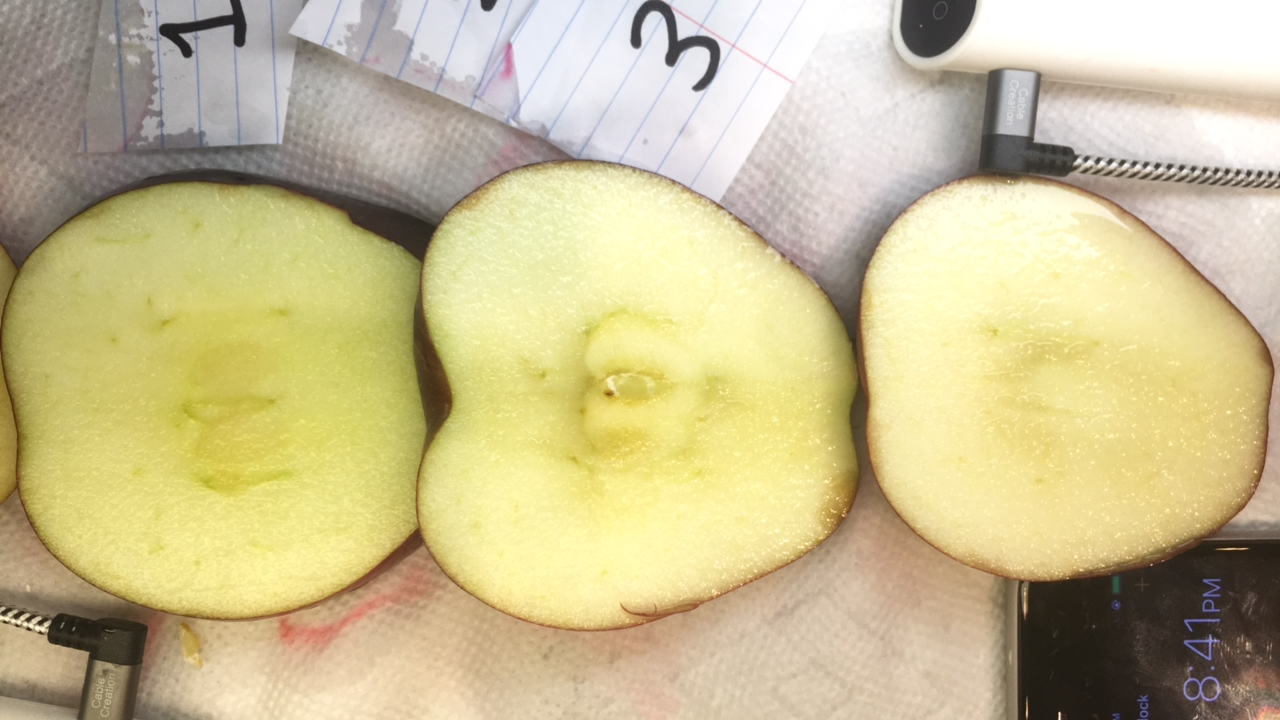

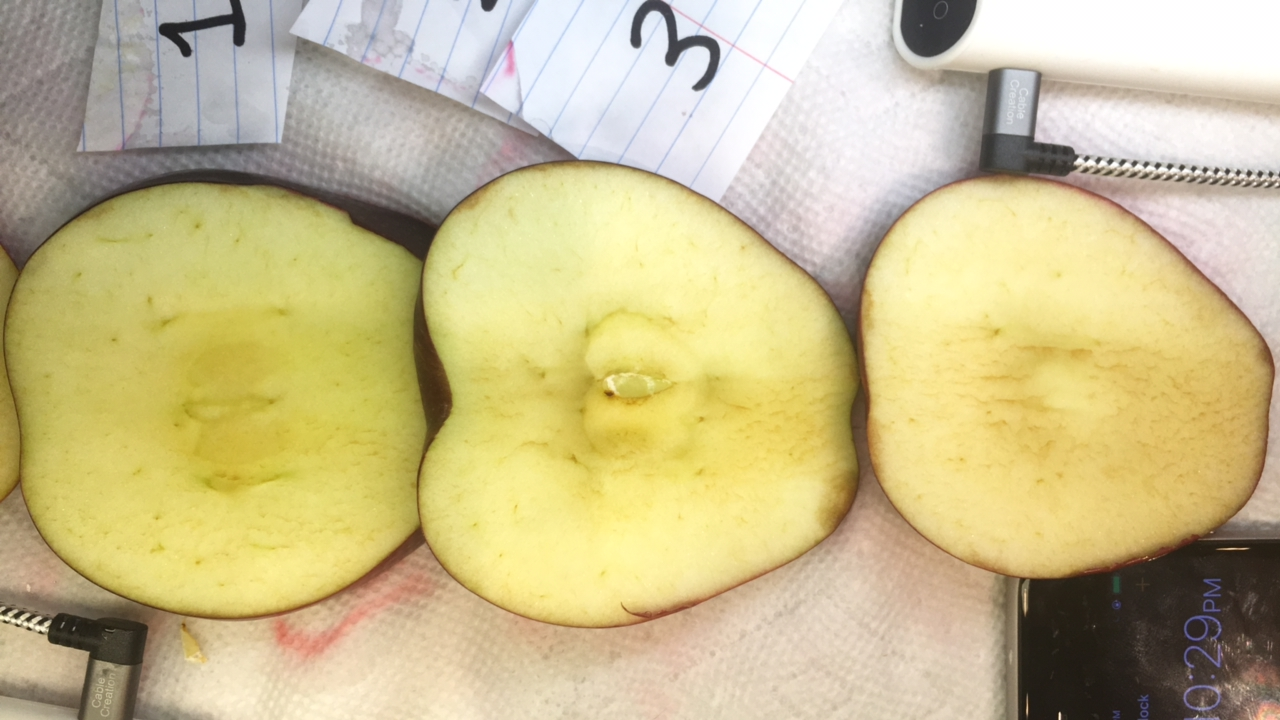

In [24]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html

# Cropped image of above dimension
# (It will not change original image)
# im1 = im.crop((left, top, right, bottom))

for ii in [ imageList[0],imageList[-1]]:
# for ii in imageList[0:5]:
    with Image.open( path + dataFolder + dataFolderType + ii ) as im:
        # im.show() # image appears in MacOS App Preview
        # im.rotate(-90)
        display( im.crop((left, top, right, bottom)) )


## Save GIFs that show animation

In [25]:
# Save files as individual gifs - not using this
if 0:
    for imageName in imageList[0:2]:
        with Image.open( path + dataFolder + dataFolderType + imageName ) as im:
            im.crop((left, top, right, bottom)).save( path + dataFolder + imageName[:-4]+'.gif' )

In [26]:
# Save all files in a single animated gif
if 1:
    out = []
    for imageName in imageList:
        with Image.open( path + dataFolder + dataFolderType + imageName ) as im:
            out.append( im.crop((left, top, right, bottom)) )

    (out[0]).save( path + dataFolder + "animated_all.gif"
                   , save_all = True
                   , append_images = out[1:]
                   , duration = 100
                   , loop = 0
                   )


In [27]:
# Save first and last files in a single animated gif

if 1:
    (out[0]).save( path + dataFolder + "animated_first_and_last.gif"
               , save_all = True
               , append_images = out[-1:]
               , duration = 100
               , loop = 0
               )


## MaKE A GRAYSCALE image

In [12]:
if 0:
    imgray = ImageOps.grayscale( im ) # https://appdividend.com/2020/06/22/how-to-convert-pil-image-to-grayscale-in-python/
    a = np.asarray( imgray )
    a.shape
    display( imgray.rotate(-90) )

## Select Region Manually

In [28]:
def onselect(eclick, erelease):
    if eclick.ydata>erelease.ydata:
        eclick.ydata,erelease.ydata = erelease.ydata,eclick.ydata
    if eclick.xdata>erelease.xdata:
        eclick.xdata,erelease.xdata = erelease.xdata,eclick.xdata
    ax.set_ylim(erelease.ydata,eclick.ydata)
    ax.set_xlim(eclick.xdata,erelease.xdata)
    fig.canvas.draw()

In [29]:
# Crop image using mouse drag of rectangle
fig = plt.figure()
ax = fig.add_subplot(111)
# filename="test.png"
filename = path + dataFolder + dataFolderType + imageList[0]
im = Image.open(filename)
arr = np.asarray(im)
plt_image = plt.imshow(arr)
# matplotlib.use('QtAgg') - works
rs = widgets.RectangleSelector(
    ax
    , onselect=onselect
    , props = dict(facecolor='red', edgecolor = 'black', alpha=0.5, fill=True)
    # , drawtype='box'
    )
    # rectprops = dict(facecolor='red', edgecolor = 'black', alpha=0.5, fill=True))
plt.show()

print('Rectangle')
print([ [ f'{x:.0f}' for x in y ] for y in rs.corners ])

Rectangle
[['30', '162', '162', '30'], ['302', '302', '511', '511']]


In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Define image from dragged rectangle in previous image
left = np.min(rs.corners[0])
right = np.max(rs.corners[0])
top = np.min(rs.corners[1])
bottom = np.max(rs.corners[1])
print( (left,top,right,bottom) )

# Show image based on crop
arr = np.asarray(im.crop((left,top,right,bottom)))
plt_image = plt.imshow(arr)
plt.show(  )

(30.467741935483872, 301.6935483870967, 162.0806451612903, 510.7258064516128)


In [31]:
if 1:
    target = "RD#1 Control" # Most of apple
    (left,top,right,bottom) = (110.4677419354839, 221.6935483870967, 332.40322580645164, 567.5)

if 1:
    target = "G#1 Control" # Most of apple
    (left,top,right,bottom) = (840.7903225806451, 239.75806451612902, 1109.1774193548385, 572.6612903225806)

if 1:
    target = "Paper Control" # Lower paper
    (left,top,right,bottom) = (365.9516129032258, 593.3064516129032, 505.30645161290323, 706.8548387096773)

if 1:
    target = "RD#2 Citric x3" # Lower paper
    (left,top,right,bottom) = (840.7903225806451, 410.08064516129025, 1083.3709677419354, 559.758064516129)

if 1:
    target = "RD#3 Water or Citric" # Lower paper
    (left,top,right,bottom) = (30.467741935483872, 301.6935483870967, 162.0806451612903, 510.7258064516128)



In [126]:
arr.shape

(346, 222, 3)

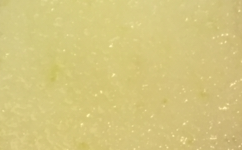

In [12]:
display( im.crop((left,top,right,bottom)) )

In [111]:
arr.shape

(114, 139, 3)

## Try measuring the color of the segment of Apple images

In [32]:
plt.imshow( arr )
plt.show(  )

In [68]:
imageList

array(['20220904_151733[1].jpg', '20220904_151833[2].jpg',
       '20220904_151933[3].jpg', '20220904_152033[4].jpg'], dtype='<U22')

In [33]:
rgb_mean = []

for ii,iim in enumerate( imageList[::1] ):
    with Image.open( path + dataFolder + dataFolderType + iim ) as im:
        # im.show() # image appears in MacOS App Preview
        # im.rotate(-90)


        if 0: # Original Full Image
            imc = im
            display( imc )
        else: # Cropped Image
            imc = im.crop((left, top, right,bottom))

        arr = np.asarray(imc)
        # print( f"Image :{ii}")
        rgb_mean.append(
            [ii, np.mean(arr[:,:,0]),np.mean(arr[:,:,1]),np.mean(arr[:,:,2])]
        )
        print(
           f"Image :{ii} Red:{np.mean(arr[:,:,0]):.2f}, Blue:{np.mean(arr[:,:,1]):.2f}, Green:{np.mean(arr[:,:,2]):.2f}"
        )

        if 0:
            if 1:
                display( imc )
            else: # Blow up the cropped image to see it better
                width,height = imc.size
                display(
                    imc.resize( (width,height) )  # .resize((new_img_width, new_img_height))
                )


        # width, height = im.size
        #display(
        #    imc.resize((width,height))
        #)

rgb_mean = np.array( rgb_mean ) # , dtype=object )

Image :0 Red:208.72, Blue:198.67, Green:111.47
Image :1 Red:208.63, Blue:198.89, Green:110.79
Image :2 Red:208.72, Blue:198.52, Green:109.86
Image :3 Red:208.88, Blue:198.17, Green:109.22
Image :4 Red:208.92, Blue:197.88, Green:108.49
Image :5 Red:208.94, Blue:197.51, Green:107.84
Image :6 Red:208.89, Blue:197.13, Green:107.31
Image :7 Red:208.61, Blue:196.75, Green:106.51
Image :8 Red:208.48, Blue:196.29, Green:105.88
Image :9 Red:208.74, Blue:196.20, Green:105.66
Image :10 Red:208.56, Blue:195.95, Green:105.24
Image :11 Red:208.63, Blue:195.78, Green:104.89
Image :12 Red:208.52, Blue:195.46, Green:104.41
Image :13 Red:208.46, Blue:195.35, Green:104.06
Image :14 Red:208.43, Blue:195.10, Green:103.63
Image :15 Red:208.55, Blue:194.97, Green:103.31
Image :16 Red:208.40, Blue:194.79, Green:103.05
Image :17 Red:208.30, Blue:194.57, Green:102.56
Image :18 Red:208.36, Blue:194.43, Green:102.38
Image :19 Red:208.30, Blue:194.24, Green:102.01
Image :20 Red:208.18, Blue:194.11, Green:101.84
Im

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( rgb_mean[:,0] , rgb_mean[:,1]/2.55 , 'r-' , label='Red')
ax.plot( rgb_mean[:,0] , rgb_mean[:,2]/2.55 , 'g-' , label='Green')
ax.plot( rgb_mean[:,0] , rgb_mean[:,3]/2.55 , 'b-' , label='Blue')
ax.legend()
ax.set_xlabel('Time [mins]')
ax.set_ylabel('Color % [Higher is Brighter]')
ax.grid( True )
plt.title( imageList[0][:-4]+" "+target )
plt.savefig(  path + dataFolder + dataFolderType + imageList[0][:-4]+" "+target+"_RGB.png" )
plt.show( )

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( rgb_mean[:,0]
         , (rgb_mean[:,1]+rgb_mean[:,2]+rgb_mean[:,3])/(3.*2.55)
         , 'k-' , label='White')
ax.legend()
ax.set_xlabel('Time [mins]')
ax.set_ylabel('Wite % [Higher is Brighter]')
ax.grid( True )

plt.title( imageList[0][:-4]+" "+target )
plt.savefig(  path + dataFolder + dataFolderType + imageList[0][:-4]+" "+target+"_White.png" )
plt.show( )